## Drug Classification - Random Forest 
This dataset and classification task can be found at https://www.kaggle.com/prathamtripathi/drug-classification. 

Task: Predict the drug type given to patients from available patient data including: age, sex, BP, cholesterol, and Na to K ratio 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df1= pd.read_csv('drug200.csv')
df1.head(n=10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [4]:
# Dataframe has no missing values
df1.isnull().values.any()

False

In [5]:
df=df1.copy()

In [6]:
#Convert values to numbers using label encoding 
le = LabelEncoder() 
df['Sex']= le.fit_transform(df['Sex'])
df['Cholesterol']= le.fit_transform(df['Cholesterol'])
df['BP']= le.fit_transform(df['BP'])
df['Drug']= le.fit_transform(df['Drug'])

/Users/carolynbland/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/carolynbland/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/carolynbland/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/carolynbland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axi

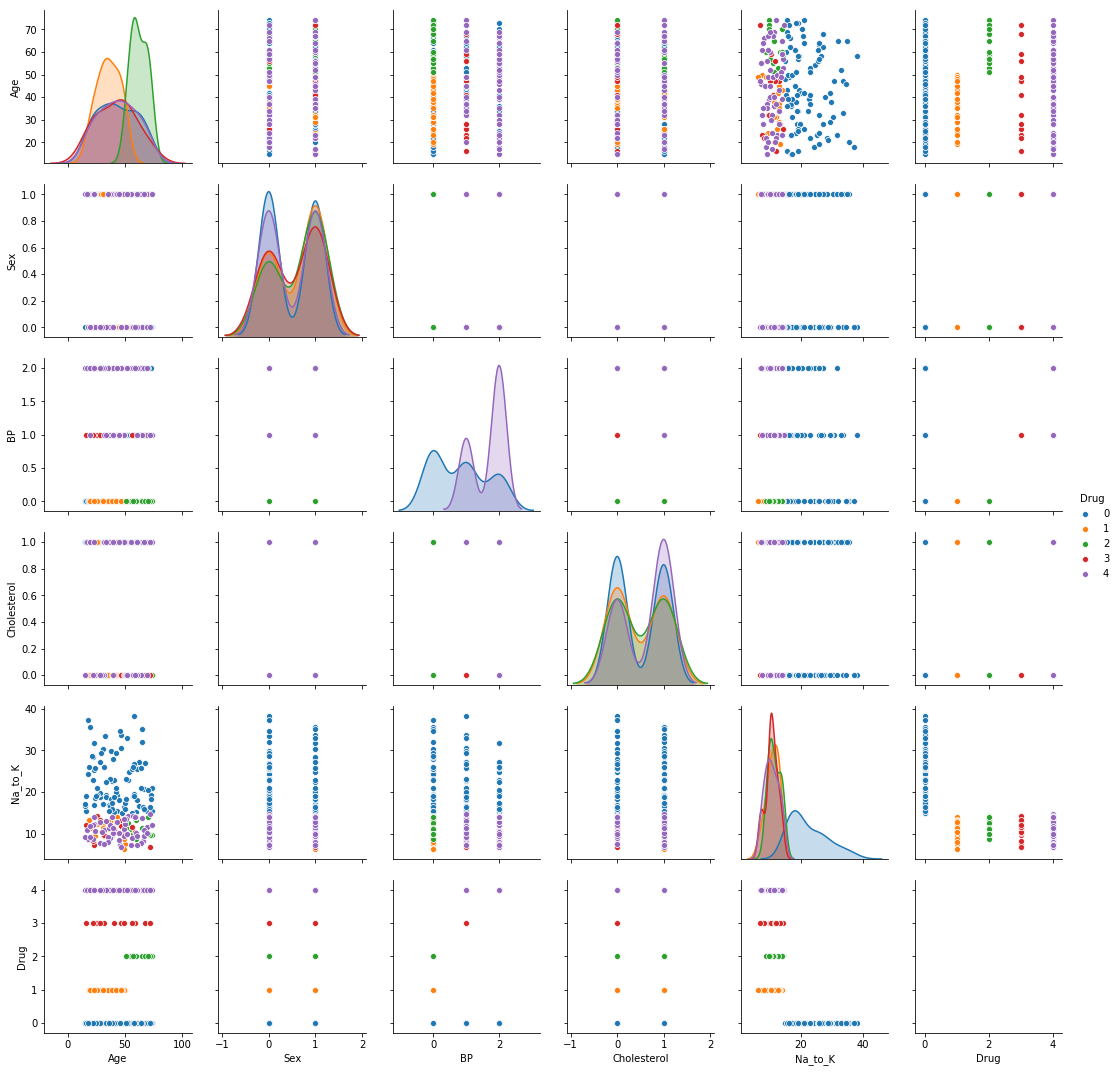

In [7]:
#Visualize Trends and Relationships of Data 
sns.pairplot(df, hue='Drug')

In [36]:
# Create arrays of feature sets and target feature 
features = df[['Sex','Age','BP','Cholesterol','Na_to_K']]
target_feature = df[['Drug']]

In [37]:
#split into training and testing data 
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target_feature,test_size=0.7,random_state=50)
print(Xtest.shape)
print(Ytest.shape)

(140, 5)
(140, 1)


In [38]:
#Random forest model 
drugmodel_rf = RandomForestClassifier(n_estimators=25)
y_model_drug = drugmodel_rf.fit(Xtrain, Ytrain).predict(Xtest)
print('Accuracy for Drug Prediction using Random Forest: ',round(accuracy_score(Ytest, y_model_drug),3))

Accuracy for Drug Prediction using Random Forest:  0.893


/Users/carolynbland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


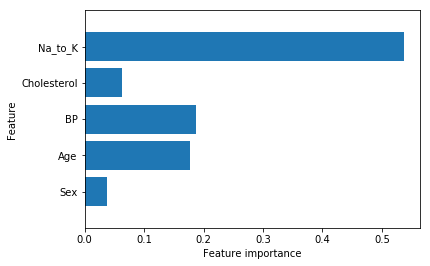

In [40]:
# Feature Importance
n_features = drugmodel_rf.n_features_
plt.barh(np.arange(n_features), drugmodel_rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), features.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features);

Text(0, 0.5, 'Testing Accuracy')

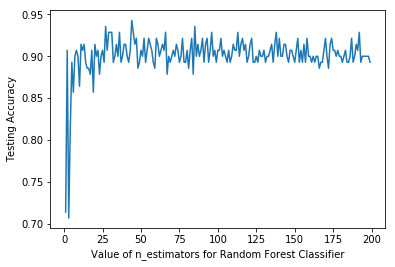

In [41]:
# Hyperparameter tuning - n_estimators 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(Xtrain, Ytrain.values.ravel())
    y_pred = rfc.predict(Xtest)
    scores.append(accuracy_score(Ytest, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [42]:
# Remove 'Sex' from the Feature set and Apply Random Forest
features_2 = df[['Age','BP','Cholesterol','Na_to_K']]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features_2,target_feature,test_size=0.7,random_state=50)
drugmodel_rf2 = RandomForestClassifier(n_estimators=25)
y_model_drug2 = drugmodel_rf.fit(Xtrain, Ytrain.values.ravel()).predict(Xtest)
print('Accuracy for Drug Prediction using Random Forest with Sex Removed: ',round(accuracy_score(Ytest, y_model_drug2),3))

Accuracy for Drug Prediction using Random Forest with Sex Removed:  0.936


In [43]:
# Remove 'Sex' and 'Cholesterol' from the Feature Set and apply Random Forest
features_3 = df[['Age','BP','Na_to_K']]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features_3,target_feature,test_size=0.7,random_state=50)
drugmodel_rf3 = RandomForestClassifier(n_estimators=25)
y_model_drug3 = drugmodel_rf.fit(Xtrain, Ytrain.values.ravel()).predict(Xtest)
print('Accuracy for Drug Prediction using Random Forest with Sex and Cholesterol Removed: ',round(accuracy_score(Ytest, y_model_drug3),3))

Accuracy for Drug Prediction using Random Forest with Sex and Cholesterol Removed:  0.879


### Summary 
Accuracy of drug classification by random forest is maximized by excluding the 'Sex' as an input feature. RF model shows accuracy of 94%. More work is needed on hyperparameter tuning of the RF model and testing the accuracy of other classification models. 